In [1]:
from multi_agent.main_agent import build_graph
from langgraph.store.memory import InMemoryStore
from langchain.embeddings import init_embeddings
from dotenv import load_dotenv


load_dotenv()
def init_store() -> InMemoryStore:
    return InMemoryStore(
        index={
            "embed": init_embeddings("openai:text-embedding-3-small"),
            "dims": 1536,
        }
    )
store = init_store()
graph = build_graph(store)

c:\Users\Stefano\OneDrive\Desktop\LLM_Agent_Cybersecurity_Forensic\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Stefano\AppData\Local\Temp\ipykernel_6072\4026092212.py:11: LangChainBetaWarning: The function `init_embeddings` is in beta. It is actively being worked on, so the API may change.
  "embed": init_embeddings("openai:text-embedding-3-small"),


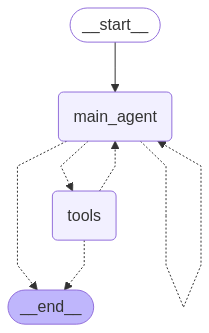

In [2]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass